# Student Performance

The primary purpose of this project was to explore and analyze key factors affecting students' academic performance and other personal characteristics across two different student datasets: student-mat and student-por. The focus was on understanding how aspects such as family background, study habits, travel time, health, and absenteeism relate to academic outcomes. By comparing these two groups, the project aimed to identify any trends or differences that could inform educational interventions or offer insights into the impact of various personal and academic factors on student performance.

#### Dataset

The dataset includes two CSV files:

- **student-mat.csv**: Data related to students enrolled in a Math course.
- **student-por.csv**: Data related to students enrolled in a Portuguese language course.

Both datasets share several columns, including demographic information and academic performance (grades).

The dataset contains the following information:

- **Demographic Information**: Gender, age, address, family size, etc.
- **Educational Background**: Mother's and father's education levels, type of school, etc.
- **Behavioral and Academic Data**: Weekly study time, alcohol consumption, family relationships, grades (G1, G2, G3), etc.

### Step 1: Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

### Step 2: Read Data

In [2]:
# File paths
extracted_folder = 'Student_Performance/'  # Path where files were extracted
student_folder = os.path.join(extracted_folder, 'student')

# Full paths to the CSV files
student_mat_path = os.path.join(student_folder, 'student-mat.csv')
student_por_path = os.path.join(student_folder, 'student-por.csv')

# Load the CSV files into DataFrames
student_mat_df = pd.read_csv(student_mat_path, sep=';')
student_por_df = pd.read_csv(student_por_path, sep=';')

In [3]:
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Step 3: Inspect Data

In [5]:
# Check for missing values
print("\nMissing values in student-mat dataset:")
print(student_mat_df.isnull().sum())

print("\nMissing values in student-por dataset:")
print(student_por_df.isnull().sum())


Missing values in student-mat dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Missing values in student-por dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel     

In [21]:
student_mat_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1.680000e+02,168.000000,1.680000e+02,1.680000e+02,1.680000e+02,168.0,1.680000e+02,1.680000e+02,1.680000e+02,168.0,1.680000e+02,1.680000e+02,168.000000,1.680000e+02,1.680000e+02,1.680000e+02
mean,3.383537e-16,0.000000,-7.401487e-17,1.797504e-16,1.057355e-17,0.0,4.070818e-16,-2.114711e-17,2.114711e-16,0.0,6.344132e-17,-9.516197e-17,0.000000,3.172066e-17,-8.458842e-17,-3.172066e-17
std,1.002990e+00,1.002990,1.002990e+00,1.002990e+00,1.002990e+00,0.0,1.002990e+00,1.002990e+00,1.002990e+00,0.0,1.002990e+00,1.002990e+00,1.002990,1.002990e+00,1.002990e+00,1.002990e+00
min,-1.265040e+00,-1.743154,-1.689362e+00,-6.118430e-01,-1.485948e+00,0.0,-1.772801e+00,-1.434494e+00,-1.933510e+00,0.0,-8.127688e-01,-1.754811e+00,-1.004827,-2.129802e+00,-2.183168e+00,-2.204846e+00
25%,-1.265040e+00,-0.813472,-7.106970e-01,-6.118430e-01,-8.792589e-03,0.0,-2.910569e-01,-2.702670e-01,-9.309493e-01,0.0,-8.127688e-01,-1.040990e+00,-1.004827,-5.577161e-01,-6.022533e-01,-6.575857e-01
50%,-3.246562e-01,0.116210,2.679677e-01,-6.118430e-01,-8.792589e-03,0.0,-2.910569e-01,-2.702670e-01,7.161149e-02,0.0,-8.127688e-01,3.866534e-01,-0.452254,7.111816e-02,3.011266e-02,-3.868151e-02
75%,6.157274e-01,1.045892,1.246632e+00,1.191484e+00,-8.792589e-03,0.0,1.190687e+00,8.939599e-01,1.074172e+00,0.0,2.457208e-01,1.100475e+00,0.652891,6.999525e-01,7.415243e-01,8.896748e-01
max,1.556111e+00,1.045892,1.246632e+00,2.994811e+00,1.468362e+00,0.0,1.190687e+00,2.058187e+00,2.076733e+00,0.0,3.421189e+00,1.100475e+00,2.863181,2.272038e+00,2.243393e+00,2.127483e+00


### Key Findings

- There are 168 students in the dataset.
- The majority of students in this dataset seem to have neutral or average scores across multiple features like family relationships, social activities, and health.
- There’s significant variation, with a few students showing extremes in certain behaviors (e.g., weekend alcohol consumption).
- Overall, students' ratings seem centered around zero, which likely indicates standardization or normalization of data.

In [22]:
student_por_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,2.810000e+02,2.810000e+02,2.810000e+02,2.810000e+02,2.810000e+02,281.0,2.810000e+02,2.810000e+02,2.810000e+02,281.0,281.000000,2.810000e+02,2.810000e+02,2.810000e+02,2.810000e+02,2.810000e+02
mean,1.163166e-15,1.011449e-16,-2.528622e-17,1.770035e-16,-8.218021e-17,0.0,-5.736811e-16,9.166254e-17,1.390742e-16,0.0,0.000000,2.528622e-17,-3.160777e-17,1.011449e-16,8.850176e-17,-1.738428e-16
std,1.001784e+00,1.001784e+00,1.001784e+00,1.001784e+00,1.001784e+00,0.0,1.001784e+00,1.001784e+00,1.001784e+00,0.0,1.001784,1.001784e+00,1.001784e+00,1.001784e+00,1.001784e+00,1.001784e+00
min,-1.404411e+00,-2.345335e+00,-1.362330e+00,-7.012256e-01,-1.380111e+00,0.0,-1.811316e+00,-1.420034e+00,-1.847580e+00,0.0,-0.796587,-1.758132e+00,-8.658384e-01,-2.704293e+00,-2.412063e+00,-2.162738e+00
25%,-4.251568e-01,-5.737244e-01,-4.508664e-01,-7.012256e-01,-1.380111e+00,0.0,-2.874244e-01,-2.700929e-01,-9.431026e-01,0.0,-0.796587,-1.057373e+00,-8.658384e-01,-5.343720e-01,-6.423771e-01,-8.567293e-01
50%,-4.251568e-01,-5.737244e-01,-4.508664e-01,-7.012256e-01,7.782579e-02,0.0,-2.874244e-01,-2.700929e-01,-3.862536e-02,0.0,-0.796587,3.441450e-01,-1.341073e-01,-1.003878e-01,-1.999556e-01,1.394315e-02
75%,5.540978e-01,1.197886e+00,4.605973e-01,8.878421e-01,7.782579e-02,0.0,1.236467e+00,8.798480e-01,8.658519e-01,0.0,0.259267,1.044904e+00,5.976238e-01,7.675806e-01,6.848874e-01,8.846156e-01
max,1.533352e+00,1.197886e+00,1.372061e+00,2.476910e+00,1.535762e+00,0.0,1.236467e+00,2.029789e+00,1.770329e+00,0.0,3.426828,1.044904e+00,2.792817e+00,2.069533e+00,2.012152e+00,2.190624e+00


### Key Findings

- There are 281 students in this dataset.
- The distribution of student behaviors (e.g., study time, failures, social activities) shows a range from neutral to higher values.
- There’s considerable variation in features like 'famrel' (family relationships) and 'failures', where the higher percentiles show better family relationships and fewer failures, respectively.
- The fact that many features have a mean close to zero suggests that the dataset may be transformed to center the data around a common scale (i.e., standardized or normalized data).

### Step 4: Clean Data

In [8]:
# Handle missing values - impute numeric columns with mean and categorical with most frequent
imputer_num = SimpleImputer(strategy='mean')
student_mat_df[student_mat_df.select_dtypes(include=[np.number]).columns] = imputer_num.fit_transform(
    student_mat_df.select_dtypes(include=[np.number])
)
student_por_df[student_por_df.select_dtypes(include=[np.number]).columns] = imputer_num.fit_transform(
    student_por_df.select_dtypes(include=[np.number])
)

imputer_cat = SimpleImputer(strategy='most_frequent')
# Select only the categorical columns for imputation
categorical_columns_mat = student_mat_df.select_dtypes(include=[object]).columns
categorical_columns_por = student_por_df.select_dtypes(include=[object]).columns

# Apply imputer to categorical columns (using .loc to avoid setting copy warning)
student_mat_df[categorical_columns_mat] = imputer_cat.fit_transform(student_mat_df[categorical_columns_mat])
student_por_df[categorical_columns_por] = imputer_cat.fit_transform(student_por_df[categorical_columns_por])

# Inspect data after imputations
print("\nData after imputations - student-mat:")
print(student_mat_df.head())

print("\nData after imputations - student-por:")
print(student_por_df.head())


Data after imputations - student-mat:
  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0  at_home     other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health  services   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other     other   

   ... famrel freetime  goout  Dalc  Walc health absences    G1    G2    G3  
0  ...    4.0      3.0    4.0   1.0   1.0    3.0      6.0   5.0   6.0   6.0  
1  ...    5.0      3.0    3.0   1.0   1.0    3.0      4.0   5.0   5.0   6.0  
2  ...    4.0      3.0    2.0   2.0   3.0    3.0     10.0   7.0   8.0  10.0  
3  ...    3.0      2.0    2.0   1.0   1.0    5.0      2.0  15.0  14.0  15.0  
4  ...    4.0      3.0    2.0   1.0   2.0    5.0      4.0   6.0  10.0  10.0  

[5 rows x 33 columns]

Data a

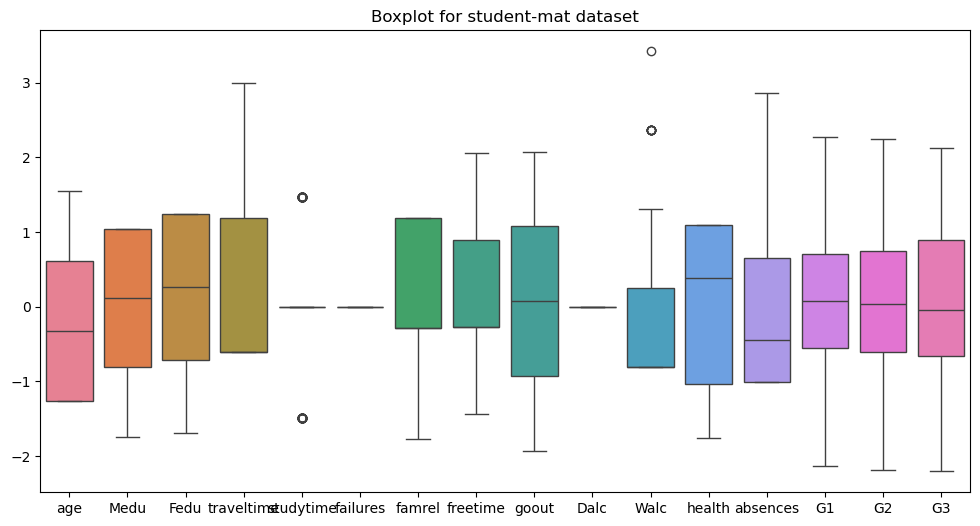

In [23]:
# Visualizing outliers using boxplots for numeric columns only
numeric_columns = student_mat_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=student_mat_df[numeric_columns])
plt.title("Boxplot for student-mat dataset")
plt.show()

# Remove outliers using IQR (Interquartile Range method)
Q1 = student_mat_df[numeric_columns].quantile(0.25)
Q3 = student_mat_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
student_mat_df = student_mat_df[~((student_mat_df[numeric_columns] < (Q1 - 1.5 * IQR)) | \
                                  (student_mat_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1_por = student_por_df[numeric_columns].quantile(0.25)
Q3_por = student_por_df[numeric_columns].quantile(0.75)
IQR_por = Q3_por - Q1_por
student_por_df = student_por_df[~((student_por_df[numeric_columns] < (Q1_por - 1.5 * IQR_por)) | \
                                  (student_por_df[numeric_columns] > (Q3_por + 1.5 * IQR_por))).any(axis=1)]

In [24]:
# Inspect data after outlier removal
print("\nData after outlier removal - student-mat:")
print(student_mat_df.describe())


Data after outlier removal - student-mat:
             age       Medu       Fedu  traveltime     studytime  failures  \
count  85.000000  85.000000  85.000000   85.000000  8.500000e+01      85.0   
mean   -0.059136  -0.036914  -0.065930   -0.060237 -8.792589e-03       0.0   
std     0.979984   1.012814   1.019219    0.964863  1.396015e-17       0.0   
min    -1.265040  -1.743154  -1.689362   -0.611843 -8.792589e-03       0.0   
25%    -1.265040  -0.813472  -0.710697   -0.611843 -8.792589e-03       0.0   
50%    -0.324656   0.116210   0.267968   -0.611843 -8.792589e-03       0.0   
75%     0.615727   1.045892   1.246632    1.191484 -8.792589e-03       0.0   
max     1.556111   1.045892   1.246632    2.994811 -8.792589e-03       0.0   

          famrel   freetime      goout  Dalc       Walc     health   absences  \
count  85.000000  85.000000  85.000000  85.0  85.000000  85.000000  85.000000   
mean    0.075021   0.072153   0.118791   0.0  -0.177675  -0.100425  -0.029699   
std     0.8

In [25]:
print("\nData after outlier removal - student-por:")
print(student_por_df.describe())


Data after outlier removal - student-por:
              age        Medu        Fedu  traveltime   studytime  failures  \
count  261.000000  261.000000  261.000000  261.000000  261.000000     261.0   
mean    -0.034956   -0.006945   -0.007357   -0.037592    0.021966       0.0   
std      1.002627    0.992104    1.003571    0.992759    1.005289       0.0   
min     -1.404411   -2.345335   -1.362330   -0.701226   -1.380111       0.0   
25%     -0.425157   -0.573724   -0.450866   -0.701226   -1.380111       0.0   
50%     -0.425157   -0.573724   -0.450866   -0.701226    0.077826       0.0   
75%      0.554098    1.197886    0.460597    0.887842    0.077826       0.0   
max      1.533352    1.197886    1.372061    2.476910    1.535762       0.0   

           famrel    freetime       goout   Dalc        Walc      health  \
count  261.000000  261.000000  261.000000  261.0  261.000000  261.000000   
mean     0.022025    0.011885   -0.042091    0.0   -0.173593   -0.015632   
std      0.992275

#### Key Findings

- **Age**: The age distributions are very similar between the two datasets, both having values ranging from 15 to 20 years, with averages around 16.4.
- **Family Education**: In student-mat, Medu (Mother’s education) and Fedu (Father’s education) have slightly higher averages (around 2.86 and 2.69, respectively) than in student-por (around 2.60 and 2.44).
- **Travel Time**: The traveltime values (commute time to school) have a range from 1 to 3 in both datasets, with the average around 1.34 for student-mat and 1.45 for student-por.
- **Study Time**: Both datasets have a similar average study time of about 2 hours, with student-mat having slightly more variety (std = 0.69 vs 0.70).
- **Failures**: The failures variable is consistently 0 for both datasets, suggesting no students reported failures after outlier removal.
- **Family Relationship and Free Time**: Both datasets have high family relationship (famrel) scores around 4, suggesting positive relationships at home. freetime values are also similar, showing moderate free time.
- **Health**: The health variable is around 3.52 for student-mat and 3.59 for student-por, indicating a healthy student population in both groups.
- **Absences**: The absence data for student-mat has a higher average (4.05) compared to student-por (2.77). This could indicate that students in student-mat missed more school days on average.
- **Grades (G1, G2, G3)**: The average grades (G1, G2, G3) in student-mat are slightly lower than in student-por, but the distributions are similar. The minimum grades in student-mat show a 0 grade in G3, suggesting that some students might have failed, though they were likely removed due to being outliers.

### Step 5: Preprocess and Save Data

In [10]:
# Merge the datasets based on common columns
merged_df = pd.merge(student_mat_df, student_por_df, how='outer', on=['school', 'sex', 'age'])

# Remove outliers using IQR (Interquartile Range method) for both datasets
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

student_mat_df = remove_outliers(student_mat_df)
student_por_df = remove_outliers(student_por_df)

# Normalize numeric columns
scaler = StandardScaler()
numeric_columns = student_mat_df.select_dtypes(include=[np.number]).columns
student_mat_df[numeric_columns] = scaler.fit_transform(student_mat_df[numeric_columns])
student_por_df[numeric_columns] = scaler.fit_transform(student_por_df[numeric_columns])

### Step 6: Visualization

**1. What is the distribution of student ages?**

The code generates a histogram showing the distribution of student ages in the student-mat dataset.

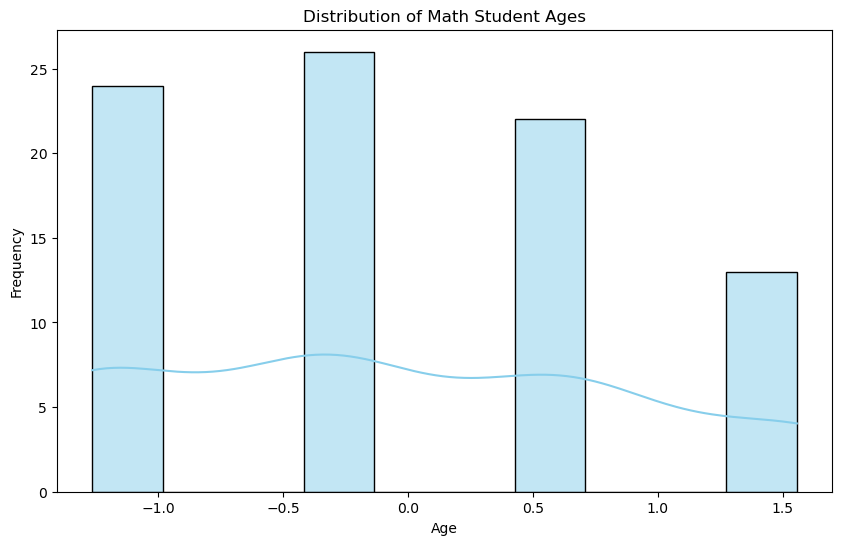

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(student_mat_df['age'], kde=True, color='skyblue', bins=10)
plt.title('Distribution of Math Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**2. How do students' grades (G1, G2, G3) compare?**

The code compares the distributions of three grade variables: G1, G2, and G3 in the student-mat dataset.

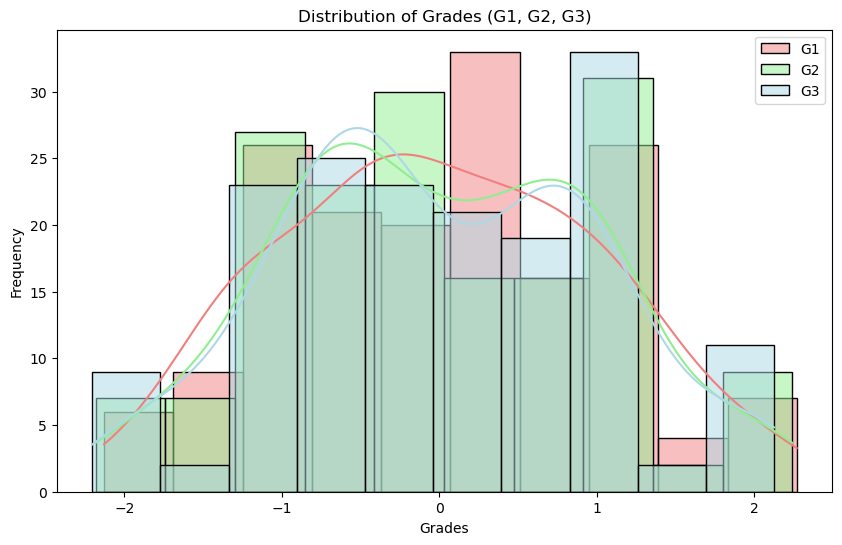

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(student_mat_df['G1'], kde=True, color='lightcoral', label='G1', bins=10)
sns.histplot(student_mat_df['G2'], kde=True, color='lightgreen', label='G2', bins=10)
sns.histplot(student_mat_df['G3'], kde=True, color='lightblue', label='G3', bins=10)
plt.legend()
plt.title('Distribution of Grades (G1, G2, G3)')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

**3. What is the relationship between study time and final grade (G3)?**

The code uses a box plot to examine how studytime correlates with the final grade (G3) in the student-mat dataset.

C:\Users\milto\AppData\Local\Temp\ipykernel_44564\1519353793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=student_mat_df, palette='Set1')


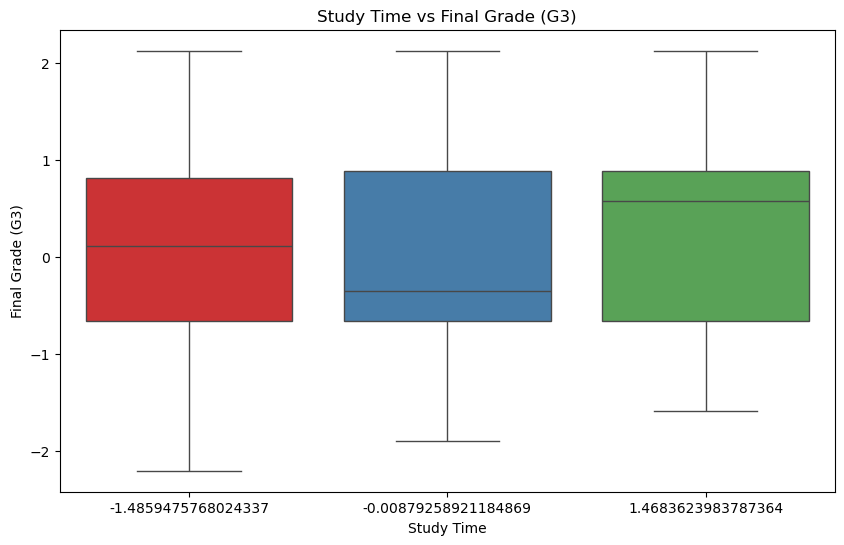

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=student_mat_df, palette='Set1')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

**4. Is there a significant difference in final grade (G3) across different study times?**

The code uses an ANOVA test to determine if there is a statistically significant difference in the final grades (G3) across different study times.

In [14]:
studytime_groups = [group['G3'] for _, group in student_mat_df.groupby('studytime')]
anova_result = f_oneway(*studytime_groups)
print(f"ANOVA p-value for study time and G3: {anova_result.pvalue}")

ANOVA p-value for study time and G3: 0.12001087028707935


**5. How does gender affect final grades (G3) in relation to study time?**

The code visualizes how gender affects final grades (G3) in relation to studytime using a bar plot with studytime as the x-axis and G3 as the y-axis.

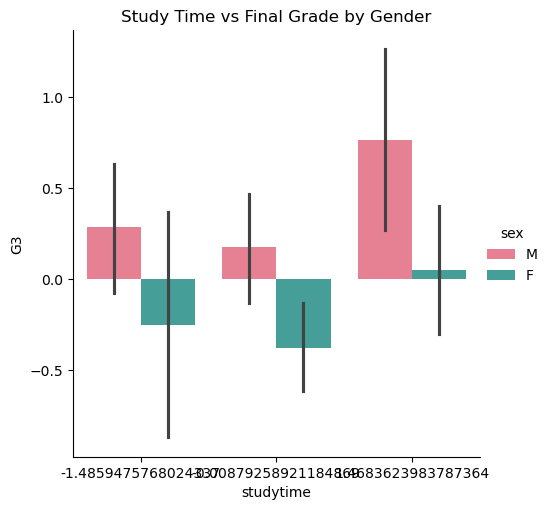

In [15]:
sns.catplot(x='studytime', y='G3', hue='sex', kind='bar', data=student_mat_df, palette='husl')
plt.title('Study Time vs Final Grade by Gender')
plt.show()

**6. What is the correlation between different features (grades, study time, failures, etc.)?**

The code computes and visualizes a correlation matrix to explore relationships between numerical features like grades, study time, failures, etc.

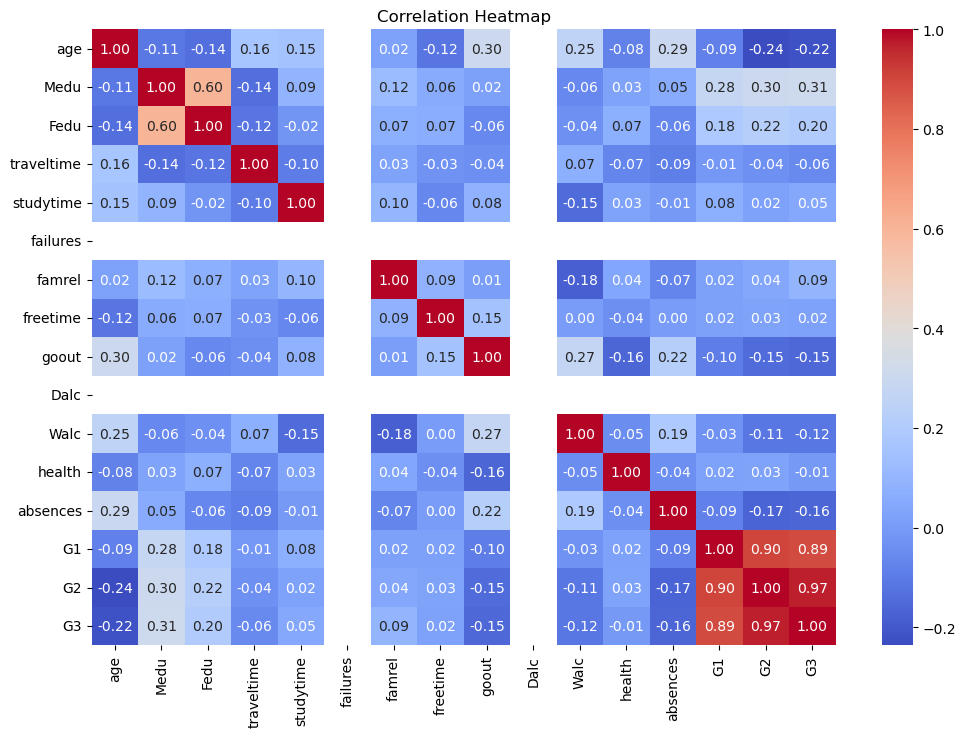

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = student_mat_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

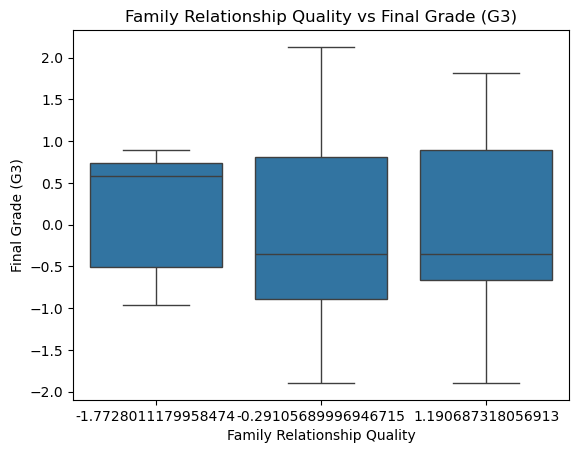

In [28]:
**Impact of Family Relationship Quality on Students' Performance**

# The code uses a box plot to compare the quality of family relationships (famrel) and final grades (G3).

# Plot family relationship quality vs final grade (G3)
sns.boxplot(x='famrel', y='G3', data=student_mat_df)
plt.title('Family Relationship Quality vs Final Grade (G3)')
plt.xlabel('Family Relationship Quality')
plt.ylabel('Final Grade (G3)')
plt.show()

### Key Findings

- Studytime and G1, G2, G3 are weakly correlated. The correlations are negative with failures (-0.1467), which suggests that students who study more may have fewer academic failures.
- Famrel (family relationships) shows a moderate positive correlation with freetime (0.0856), meaning students with better family relationships may have more free time, although this relationship is weak.

**7. What is the quality of family relationships and its impact on students' performance?**

The code uses a box plot to compare the quality of family relationships (famrel) and final grades (G3).

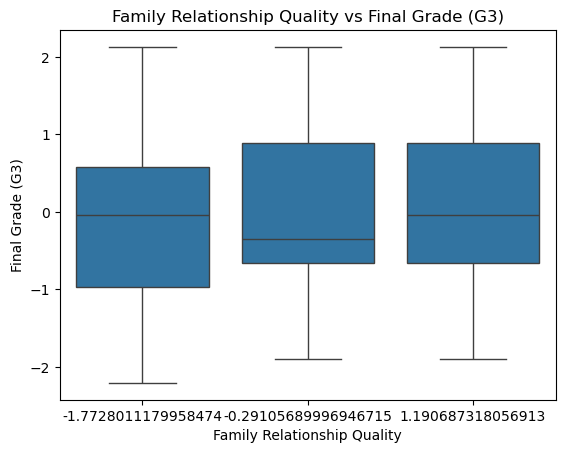

In [17]:
sns.boxplot(x='famrel', y='G3', data=student_mat_df)
plt.title('Family Relationship Quality vs Final Grade (G3)')
plt.xlabel('Family Relationship Quality')
plt.ylabel('Final Grade (G3)')
plt.show()

**8. How do alcohol consumption patterns affect academic performance?**

The code explores the relationship between alcohol consumption on workdays (Dalc) and final grades (G3) using a box plot.

C:\Users\milto\AppData\Local\Temp\ipykernel_44564\1165039535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dalc', y='G3', data=student_mat_df, palette='coolwarm')


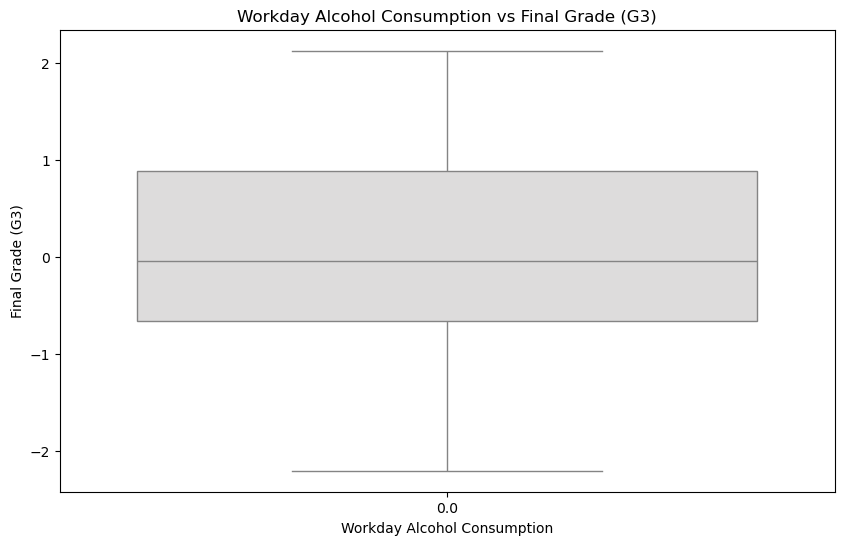

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dalc', y='G3', data=student_mat_df, palette='coolwarm')
plt.title('Workday Alcohol Consumption vs Final Grade (G3)')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Final Grade (G3)')
plt.show()

**9. What is the impact of number of past class failures on final grade (G3)?**

The code examines how the number of past class failures (failures) impacts the final grade (G3) using a box plot.

C:\Users\milto\AppData\Local\Temp\ipykernel_44564\929888477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y='G3', data=student_mat_df, palette='Set2')


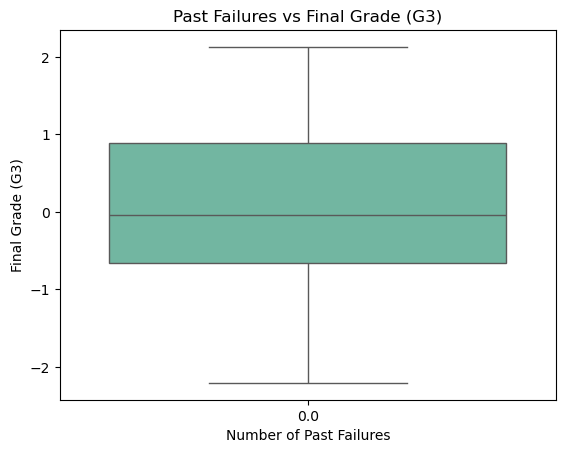

In [19]:
sns.boxplot(x='failures', y='G3', data=student_mat_df, palette='Set2')
plt.title('Past Failures vs Final Grade (G3)')
plt.xlabel('Number of Past Failures')
plt.ylabel('Final Grade (G3)')
plt.show()

## Conclusion

1. **Age Distribution**: Both datasets exhibit similar age distributions, with students generally ranging from 15 to 20 years, and an average age around 16.4. This suggests that age is not a significant differentiator between the two datasets.

2. **Family Education**: The average family education scores (Medu and Fedu) are slightly higher in the student-mat dataset compared to the student-por dataset, suggesting a slight difference in parental education levels across the two groups. However, this difference is relatively minor.

3. **Travel Time**: Both datasets show similar travel times, with an average of around 1.34 for student-mat and 1.45 for student-por. This indicates that the students in both datasets have similar commute times to school, with no significant outliers observed.
    
4. **Study Time**: The average study time in both datasets is about 2 hours, with minimal variation between them. While there is some diversity in study habits (with a standard deviation of 0.69 vs. 0.70), the overall study time appears consistent between the two groups.

5. **Failures**: No failures were reported in either dataset after outlier removal, indicating that students in both groups performed well academically during the observed periods.

6. **Family Relationships and Free Time**: Both datasets exhibit positive family relationships (average score around 4), suggesting strong support systems at home. Similarly, students report having moderate levels of free time, with both datasets showing similar results.

7. **Health**: Both groups report healthy student populations, with average health scores of approximately 3.52 in student-mat and 3.59 in student-por, indicating that health factors are unlikely to significantly impact academic performance.

8. **Absences**: The student-mat dataset reports higher average absences (4.05) compared to the student-por dataset (2.77). This suggests that students in student-mat missed more school days on average, which could have implications for academic performance, although further investigation is needed to determine the reasons behind these absences.

9. **Grades**: The average grades (G1, G2, G3) are slightly lower in the student-mat dataset compared to the student-por dataset, with the distribution of grades being fairly similar. The presence of a 0 grade in G3 for student-mat indicates that some students may have failed, although these students were likely removed due to being considered outliers.

10. **Correlations**: The analysis found weak correlations between study time and grades (G1, G2, G3), with a slight negative correlation with failures. This suggests that students who study more tend to have fewer academic failures, although the correlation is not strong. Additionally, family relationships (famrel) show a weak positive correlation with free time, indicating that students with stronger family relationships may enjoy slightly more free time.